In [1]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from pandas.api.types import is_string_dtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('data.csv')

In [18]:
dataset

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,1480000.0,2.0,0,2.5,1.0,1.0,202.0,NaN,NaN
2,1035000.0,2.0,0,2.5,1.0,0.0,156.0,79.0,1900.0
4,1465000.0,3.0,0,2.5,2.0,0.0,134.0,150.0,1900.0
5,850000.0,3.0,0,2.5,2.0,1.0,94.0,NaN,NaN
6,1600000.0,4.0,0,2.5,1.0,2.0,120.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...
23671,622500.0,2.0,1,6.8,2.0,1.0,NaN,89.0,2010.0
23672,2500000.0,4.0,0,6.8,1.0,5.0,866.0,157.0,1920.0
23675,1100000.0,4.0,0,12.7,3.0,2.0,NaN,NaN,NaN
23676,1285000.0,4.0,0,6.3,1.0,1.0,362.0,112.0,1920.0


In [4]:
#Select columns for X
cols = dataset.columns
cols = cols.drop('Price')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23678 entries, 0 to 23677
Data columns (total 21 columns):
Suburb           23547 non-null object
Address          23547 non-null object
Rooms            23547 non-null float64
Type             23547 non-null object
Price            18396 non-null float64
Method           23547 non-null object
SellerG          23547 non-null object
Date             23547 non-null object
Distance         23546 non-null float64
Postcode         23546 non-null float64
Bedroom2         19066 non-null float64
Bathroom         19063 non-null float64
Car              18921 non-null float64
Landsize         17410 non-null float64
BuildingArea     10018 non-null float64
YearBuilt        11540 non-null float64
CouncilArea      15656 non-null object
Lattitude        19243 non-null float64
Longtitude       19243 non-null float64
Regionname       23546 non-null object
Propertycount    23546 non-null float64
dtypes: float64(13), object(8)
memory usage: 3.8+ MB


In [19]:
dataset.shape

(18396, 9)

In [34]:
dataset.dtypes

Price           float64
Rooms           float64
Type               int8
Distance        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
dtype: object

In [20]:
dataset.describe

<bound method NDFrame.describe of            Price  Rooms  Type  Distance  Bathroom  Car  Landsize  \
1      1480000.0    2.0     0       2.5       1.0  1.0     202.0   
2      1035000.0    2.0     0       2.5       1.0  0.0     156.0   
4      1465000.0    3.0     0       2.5       2.0  0.0     134.0   
5       850000.0    3.0     0       2.5       2.0  1.0      94.0   
6      1600000.0    4.0     0       2.5       1.0  2.0     120.0   
...          ...    ...   ...       ...       ...  ...       ...   
23671   622500.0    2.0     1       6.8       2.0  1.0       NaN   
23672  2500000.0    4.0     0       6.8       1.0  5.0     866.0   
23675  1100000.0    4.0     0      12.7       3.0  2.0       NaN   
23676  1285000.0    4.0     0       6.3       1.0  1.0     362.0   
23677  1050000.0    4.0     0       6.3       2.0  2.0       NaN   

       BuildingArea  YearBuilt  
1               NaN        NaN  
2              79.0     1900.0  
4             150.0     1900.0  
5               N

In [22]:
dataset.columns

Index(['Price', 'Rooms', 'Type', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt'],
      dtype='object')

In [29]:
dataset[dataset['Rooms'].isnull()]

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt


In [30]:
dataset[dataset['Price'].isnull()]

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt


In [32]:
dataset.count()

Price           18396
Rooms           18396
Type            18396
Distance        18395
Bathroom        14925
Car             14820
Landsize        13603
BuildingArea     7762
YearBuilt        8958
dtype: int64

In [33]:
dataset.isna()

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
23671,False,False,False,False,False,False,True,False,False
23672,False,False,False,False,False,False,False,False,False
23675,False,False,False,False,False,False,True,True,True
23676,False,False,False,False,False,False,False,False,False


In [35]:
dataset_missing = dataset.isna()
dataset_missing.head()

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False


In [37]:
dataset_missing.dtypes

Price           bool
Rooms           bool
Type            bool
Distance        bool
Bathroom        bool
Car             bool
Landsize        bool
BuildingArea    bool
YearBuilt       bool
dtype: object

In [39]:
dataset_num_missing = dataset_missing.sum()
dataset_num_missing

Price               0
Rooms               0
Type                0
Distance            1
Bathroom         3471
Car              3576
Landsize         4793
BuildingArea    10634
YearBuilt        9438
dtype: int64

In [40]:
len(dataset)

18396

In [41]:
dataset_num_missing / len(dataset)

Price           0.000000
Rooms           0.000000
Type            0.000000
Distance        0.000054
Bathroom        0.188682
Car             0.194390
Landsize        0.260546
BuildingArea    0.578060
YearBuilt       0.513046
dtype: float64

In [43]:
dataset_missing.mean()

Price           0.000000
Rooms           0.000000
Type            0.000000
Distance        0.000054
Bathroom        0.188682
Car             0.194390
Landsize        0.260546
BuildingArea    0.578060
YearBuilt       0.513046
dtype: float64

In [48]:
num_missing = (dataset[[]] == 0).sum()

In [49]:
print(num_missing)

Series([], dtype: float64)


In [50]:
dataset.fillna(dataset.mean(), inplace=True)

In [51]:
print(dataset.isnull().sum())

Price           0
Rooms           0
Type            0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
dtype: int64


In [44]:
dataset.isna().mean().round(4) * 100

Price            0.00
Rooms            0.00
Type             0.00
Distance         0.01
Bathroom        18.87
Car             19.44
Landsize        26.05
BuildingArea    57.81
YearBuilt       51.30
dtype: float64

In [46]:
dataset.apply(lambda x: x.count(), axis=1)

1        7
2        9
4        9
5        7
6        9
        ..
23671    8
23672    9
23675    6
23676    9
23677    8
Length: 18396, dtype: int64

In [57]:
from numpy import nan

In [61]:
dataset[['Price' ,'YearBuilt']] = dataset[['Price','YearBuilt']].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)

In [62]:
dataset

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,1480000.0,2.0,0,2.5,1.0,1.0,202.000000,151.220219,1965.879996
2,1035000.0,2.0,0,2.5,1.0,0.0,156.000000,79.000000,1900.000000
4,1465000.0,3.0,0,2.5,2.0,0.0,134.000000,150.000000,1900.000000
5,850000.0,3.0,0,2.5,2.0,1.0,94.000000,151.220219,1965.879996
6,1600000.0,4.0,0,2.5,1.0,2.0,120.000000,142.000000,2014.000000
...,...,...,...,...,...,...,...,...,...
23671,622500.0,2.0,1,6.8,2.0,1.0,558.116371,89.000000,2010.000000
23672,2500000.0,4.0,0,6.8,1.0,5.0,866.000000,157.000000,1920.000000
23675,1100000.0,4.0,0,12.7,3.0,2.0,558.116371,151.220219,1965.879996
23676,1285000.0,4.0,0,6.3,1.0,1.0,362.000000,112.000000,1920.000000


In [59]:
#Drop down data instances whose Sale Price is not defined
dataset = dataset[dataset.Price.notnull()]

#Display 1st five instances of data
dataset.head()

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,1480000.0,2.0,0,2.5,1.0,1.0,202.0,151.220219,1965.879996
2,1035000.0,2.0,0,2.5,1.0,0.0,156.0,79.000000,1900.000000
4,1465000.0,3.0,0,2.5,2.0,0.0,134.0,150.000000,1900.000000
5,850000.0,3.0,0,2.5,2.0,1.0,94.0,151.220219,1965.879996
6,1600000.0,4.0,0,2.5,1.0,2.0,120.0,142.000000,2014.000000


In [6]:
#Seperate categorical from numerical data
categorical_data = dataset.select_dtypes(exclude = [np.number])
numerical_data = dataset.select_dtypes(include = [np.number])

In [7]:
#Tranform categorical data into numerical data for training purpose
for col, col_data in dataset.items():
    if is_string_dtype(col_data):
        dataset[col] = dataset[col].astype('category').cat.as_ordered().cat.codes


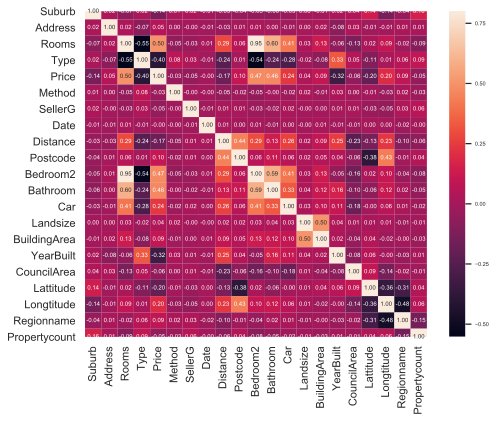

In [8]:
# SalePrice correlation matrix
correlationmatrix = dataset.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=0.5)
sns.heatmap(correlationmatrix,annot=True, square=True, fmt='.2f', vmax=.8);

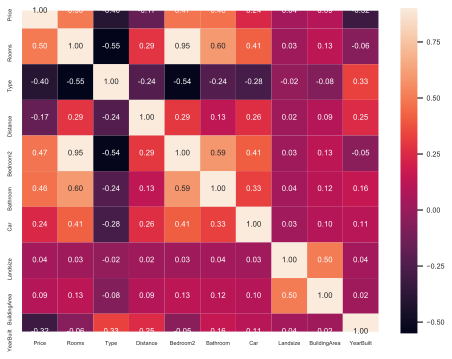

In [9]:
# choosing features to check the collinearity between them
correlationcolumns = ['Price', 'Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Car','Landsize','BuildingArea', 'YearBuilt']
correlationmatrix = dataset[correlationcolumns].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.set(font_scale=0.65)
sns.heatmap(correlationmatrix,annot=True, square=True, fmt='.2f', vmax=.9);

In [10]:
'''As we can see that there is high correlation between Rooms and Bedroom2 i.e 0.96, so we will remove Bedroom2 feature'''
correlationcolumns.remove('Bedroom2')
cols = correlationcolumns
dataset = dataset[cols]
dataset.head()

,Price,Rooms,Type,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt
1,1480000.0,2.0,0,2.5,1.0,1.0,202.0,NaN,NaN
2,1035000.0,2.0,0,2.5,1.0,0.0,156.0,79.0,1900.0
4,1465000.0,3.0,0,2.5,2.0,0.0,134.0,150.0,1900.0
5,850000.0,3.0,0,2.5,2.0,1.0,94.0,NaN,NaN
6,1600000.0,4.0,0,2.5,1.0,2.0,120.0,142.0,2014.0


In [11]:
#Fill in null data cells using Simple Imputer
y = dataset.Price
X = SimpleImputer().fit_transform(dataset[cols])

In [12]:
#Split the data into training and validation data sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3)

#Standardize the data before feeding it to PCA algorithm
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)

#Use PCA algorithm to reduce the number of features to speed up training 
pca = PCA(.95)
pca.fit(train_X)

train_X = pca.transform(train_X)
val_X = pca.transform(val_X)

In [13]:
#Train a model using DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1, splitter='best')
model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [14]:
#Validate the trained model using validation data-set
crossvalidationtest = cross_val_score(model, X, y)

meanabsoluteerror = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error')

print("Model Accuracy:\t",crossvalidationtest.mean())
print("\nMean Absolute Error:\t",(-1 * meanabsoluteerror.mean()))

Model Accuracy:	 0.9994567499848668

Mean Absolute Error:	 561.7639080356194


In [15]:
#Predict Sale Price for houses in cross validation set
prediction_y = model.predict(val_X)

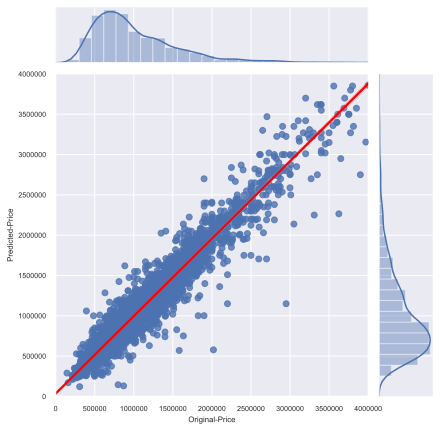

In [16]:
#Plot the actual Price value against predicted Sale Price 
g = sns.jointplot(x= val_y, y= prediction_y, kind='reg', xlim=(0,4000000), ylim=(0,4000000),
                  joint_kws={'line_kws':{'color':'red'}})
g.set_axis_labels(xlabel='Original-Price', ylabel='Predicted-Price')